In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df2 = pd.read_csv('task2.csv')
df2.head()

,x1,x2,y
0,0.996321,2.901429,-61.310885
1,3.855952,2.197317,64.918210
2,-0.751851,1.311989,64.317646
3,-1.535331,2.732352,53.659943
4,2.808920,2.416145,120.558418


The dataset consists of continuous numbers without distinct classes/categories. Hence, the problem represents to be of `Regression`.

In [3]:
X = df2.iloc[:, 0:2]
y = df2.iloc[:, 2]

array([[<Axes: xlabel='x1', ylabel='x1'>,
        <Axes: xlabel='x2', ylabel='x1'>,
        <Axes: xlabel='y', ylabel='x1'>],
       [<Axes: xlabel='x1', ylabel='x2'>,
        <Axes: xlabel='x2', ylabel='x2'>,
        <Axes: xlabel='y', ylabel='x2'>],
       [<Axes: xlabel='x1', ylabel='y'>, <Axes: xlabel='x2', ylabel='y'>,
        <Axes: xlabel='y', ylabel='y'>]], dtype=object)

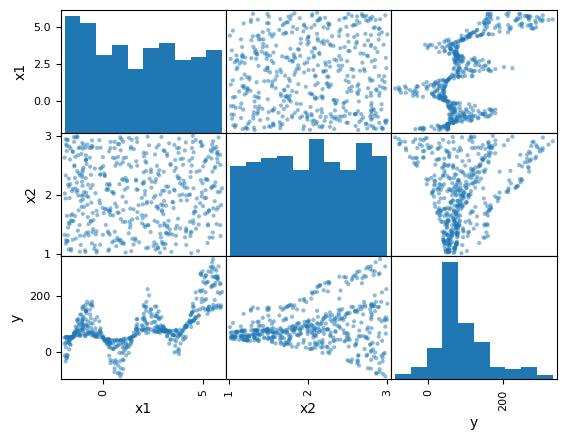

In [4]:
pd.plotting.scatter_matrix(df2)

It is observed that there exists a correlation between the dependent variable `(y)` and each of the independent variables `(x1 & x2)`, while the independent variables themselves do not appear to be correlated with each other.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [6]:
# After working with multiple values of learning rates, this is the best list of values found.

learning_rates = [0.3,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.5]

In [7]:
training_scores = []
testing_scores = []
mse_scores = []

for learning_rate in learning_rates:
    
    # Selecting a Non-Linear model (Neural Network - MLPRegressor) for making predictions.
    reg2 = MLPRegressor(learning_rate='constant', learning_rate_init=learning_rate, 
                        hidden_layer_sizes = (100), max_iter = 1000, solver = 'adam', random_state=42)
    reg2.fit(X_train, y_train)

    r2_train_score = reg2.score(X_train, y_train)
    r2_test_score = reg2.score(X_test, y_test)

    y_pred = reg2.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    
    mse_scores.append(mse)
    training_scores.append(r2_train_score)
    testing_scores.append(r2_test_score)

# Checking for model convergence with an if-else statement; if not converged, we increase 'max_iter'.
if reg2.n_iter_ < reg2.max_iter:
    print("The model has converged.")
else:
    print("The model has Not converged.")

The model has converged.


In [8]:
print('Coefficient of Determination of Train Set:\n')
print(training_scores)
print()
print('Coefficient of Determination of Test Set:\n')
print(testing_scores)
print()
print('MSE:\n')
print(mse_scores)

Coefficient of Determination of Train Set:

[0.7730642052912683, 0.7677638472768495, 0.7724642933581752, 0.7619249160886976, 0.8567104757916885, 0.7894969488796887, 0.8095611119337671, 0.7592192818963264, 0.7757107478716891, 0.7539608646496643, 0.7962787455495366, 0.7615048381993054, 0.733351543175701, 0.7490123854269676, 0.7057243373677201, 0.757411015532255, 0.799655056678284, 0.7252246233227142, 0.6843151324488479, 0.7141793350228858, 0.7128471241402085]

Coefficient of Determination of Test Set:

[0.7410613438333771, 0.743816620637574, 0.7481623750190556, 0.732828051830944, 0.8136403449058549, 0.7562471067533741, 0.7964986609931246, 0.7345622010280182, 0.7410543169927741, 0.7362630226057589, 0.7427911569765824, 0.7416370032719088, 0.6927799469013534, 0.7116160163508597, 0.6333530872398101, 0.7437452128969304, 0.7242734796369141, 0.6942357483923105, 0.6659018910871475, 0.650859546718688, 0.6538554687518061]

MSE:

[1164.4135790452365, 1152.0234563330414, 1132.481162077307, 1201.4376

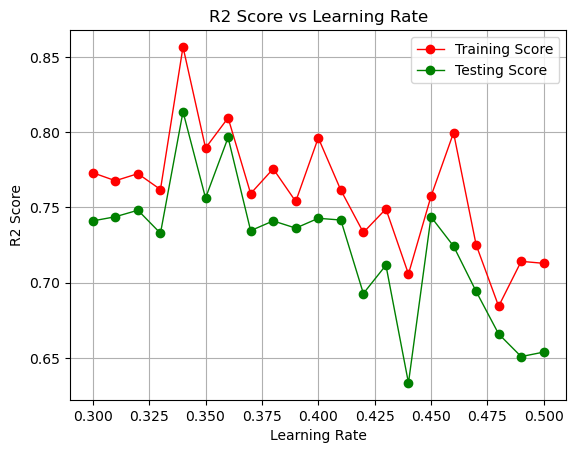

In [9]:
plt.plot(learning_rates, training_scores, label='Training Score', marker = 'o', linewidth = 1, color = 'red')
plt.plot(learning_rates, testing_scores, label='Testing Score', marker = 'o', linewidth = 1, color = 'green')
plt.xlabel('Learning Rate')
plt.ylabel('R2 Score')
plt.title('R2 Score vs Learning Rate')
plt.grid()
plt.legend()
plt.show()

The graph above shows us which `Learning Rate` gives us the highest `R2-Score` for both the `Training Data` and `Testing Data`.

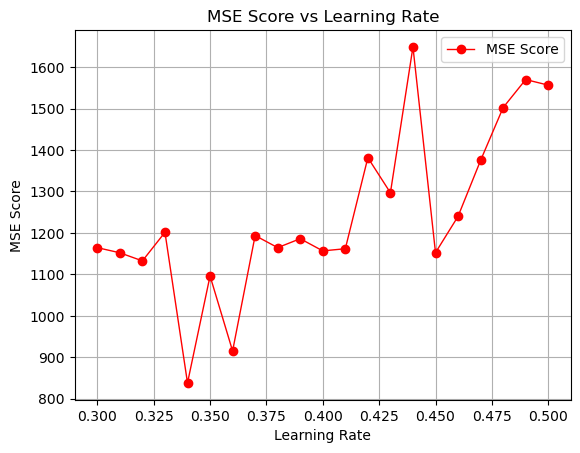

In [10]:
plt.plot(learning_rates, mse_scores, label='MSE Score', marker = 'o', linewidth = 1, color = 'red')
plt.xlabel('Learning Rate')
plt.ylabel('MSE Score')
plt.title('MSE Score vs Learning Rate')
plt.grid()
plt.legend()
plt.show()

The graph above shows us which `learning rate` gives us the `Lowest MSE Score`.

In [11]:
# Selecting the best learning rate based on maximum test R2-Score achieved.
blr = learning_rates[np.argmax(testing_scores)]
print("Best Learning Rate:", blr)

Best Learning Rate: 0.34


In [12]:
# Selecting the best learning rate based on minimum MSE score achieved.
blr = learning_rates[np.argmin(mse_scores)]
print(f"Best Learning Rate:", blr)

Best Learning Rate: 0.34


In [13]:
# Constructing a Best Regression Model using the identified Best Learning Rate.

best_reg2 = MLPRegressor(learning_rate='constant', learning_rate_init=blr, hidden_layer_sizes=(100), solver = 'adam', random_state=42)
best_reg2.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=100, learning_rate_init=0.34, random_state=42)

In [14]:
mse_train = mean_squared_error(y_train, best_reg2.predict(X_train))
mse_test = mean_squared_error(y_test, best_reg2.predict(X_test))

print("Mean Squared Error on Training Set:", mse_train)
print("Mean Squared Error on Test Set:", mse_test)

Mean Squared Error on Training Set: 810.8100968899438
Mean Squared Error on Test Set: 838.035217260776


After testing different learning rates, the rate of `0.34` gave the lowest `MSE Scores`: `810.810` for `Training` and `838.035` for `Testing`.

In [15]:
print('Generalization Error:', mse_test - mse_train)

Generalization Error: 27.2251203708322


A `Generalization Error` of `27.22` indicates that our model predicts with `High Accuracy` due to its low positive value.